# Part I: Observe Data
We may be negligent when we input data to excel, from hand-written records or hospital's digital database system.
To avoid further mistake when using these data, we first observe them, draw some line charts.
If any data looks weird in the line chart, say a lot higher in the chart, it might be a missing decimal point, so we need to check twice on this data.
We draw line charts because observing charts is easier than digits.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# Run some setup code for this notebook.
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn import svm
from sklearn import neighbors
from sklearn import preprocessing

from utils.data_utils import *
#from utils.data_processing import *
from __future__ import print_function

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [ ]:
# Load the data into a dict: "feature_dict{}".
path = 'dataset_new'
feature_dict = load_features(path, dont_show=False)
observe_data(feature_dict)

# Part II: Make up for lost data

## Method I: kNN (k-nearest-neighbors)

In [4]:
## Find full data features and missing data features.
path = 'dataset_new'
feature_dict = load_features(path, dont_show=True)
show_feature_details(feature_dict)

Feature dict loaded.

Missing data features:
997_blood_Ca 5


Full data features:
1_24h_urinary_microalbumin
2_24h_urine_protein
3_25oh_vd
4_25oh_vd3
5_2h_fasting_glucose
6_8_blood_cortisol
7_age
8_alt
9_ast
10_blood_protein
11_blood_urea_nitrogen
12_blood_uric_acid
13_c_peptide
14_c_reactive_protein
15_calf
16_creatine_kinase
17_creatinine
18_cystatin_c
19_fasting_glucose
20_fasting_insulin
21_ft3
22_ft4
23_gender
24_glycated_hemoglobin
25_grip_strength
26_hbg
27_hdlc
28_height
29_movement_hours
30_plt
31_pth
32_rbc
33_sleep_time
34_total_cholesterol
35_triglyceride
36_tsh
37_wbc
38_weight
39_h2
40_6m_speed
41_bmi
42_history_of_fall
43_history_of_cerebrovascular_disease
44_course_of_diabetes
45_exogenous_insulin
46_oral_antidiabetic_drug
47_hypertension_duration
48_history_of_coronary_heart_disease
49_ldlc
50_smoking_history
51_has_hypertension
52_do_exercise
53_sulfonylureas
54_non_sulfonylureas
55_biguanides
56_glycosidase_inhibitor
57_chinese_medicine
58_thiazolidinediones
59_glp1d

In [5]:
# Select some features to perform knn to make up the missing data.
# Select a feature to predict its missing data.
using_feature_index = [1, 2, 17, 63, 64, 65]
feature_to_makeup = feature_dict[67]
X = load_using_features(feature_dict, using_feature_index, False)
X_normalized = normalize_data(X, feature_dict, using_feature_index, dont_show=True)
print("\nFeature to make up: ", feature_to_makeup)
y_to_makeup = np.loadtxt("%s/%s.txt" %(path, feature_to_makeup))
X_train, y_train, X_predict, train_patients, predict_patients = split_train_predict_set(X_normalized, y_to_makeup, dont_show=True)

Using feature:
1_24h_urinary_microalbumin
2_24h_urine_protein
17_creatinine
63_chewing_ability
64_fundal_photograph
65_dpn
Loading (6) features, done.

Feature to make up:  997_blood_Ca



Weights: 'uniform':
Patient id: 28, 2.14500
Patient id: 31, 2.18000
Patient id: 93, 2.21500
Patient id: 100, 2.19000
Patient id: 123, 2.17700

Weights: 'distance':
Patient id: 28, 2.09071
Patient id: 31, 2.15520
Patient id: 93, 2.20322
Patient id: 100, 2.18363
Patient id: 123, 2.18838


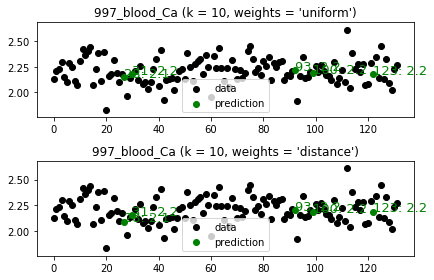

In [6]:
n_neighbors = 10

for i, weights in enumerate(['uniform', 'distance']): #'distance'
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_predict = knn.fit(X_train, y_train).predict(X_predict)
    #print("neighbors:", knn.kneighbors(X_predict, return_distance=False)) # neighbor index excluded y_predict.
    print("\nWeights: '{0}':".format(weights))
    len_predict = len(predict_patients)
    for j in np.arange(len_predict):
        print("Patient id: %d, %.5f" % (predict_patients[j]+1, y_predict[j]))
    plt.subplot(2, 1, i + 1)
    for i, txt in enumerate(y_predict):
        plt.annotate("%d: %.1f" %(predict_patients[i]+1, txt), (predict_patients[i], y_predict[i]), size=13, color='g')
    plt.scatter(train_patients, y_train, c='k', label='data')
    plt.scatter(predict_patients, y_predict, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("%s (k = %i, weights = '%s')" % (feature_to_makeup, n_neighbors, weights))

plt.tight_layout()
plt.show()